In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

In [19]:
darkimg=cv2.imread(r"C:\Users\meric\Desktop\Computer-Vision-with-Python\DATA\horse.jpg")
darkshow=cv2.cvtColor(darkimg,cv2.COLOR_BGR2RGB)

In [20]:
rainbow=cv2.imread(r"C:\Users\meric\Desktop\Computer-Vision-with-Python\DATA\rainbow.jpg")
rainshow=cv2.cvtColor(rainshow,cv2.COLOR_BGR2RGB)

In [26]:
bricksimg=cv2.imread(r"C:\Users\meric\Desktop\Computer-Vision-with-Python\DATA\bricks.jpg")
brickshow=cv2.cvtColor(bricksimg,cv2.COLOR_BGR2RGB)

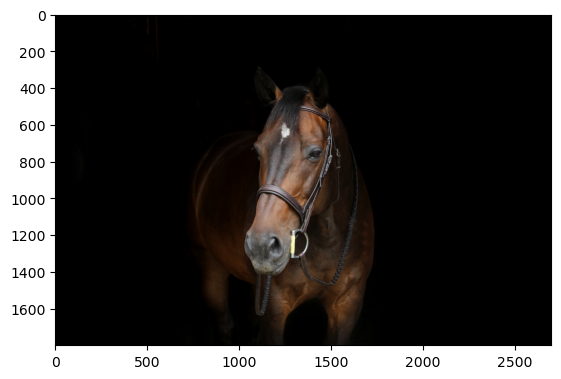

In [24]:
plt.imshow(darkshow)#siyaha yakın renk olduğundan 0 a yakın renk olmasını beklerdim 

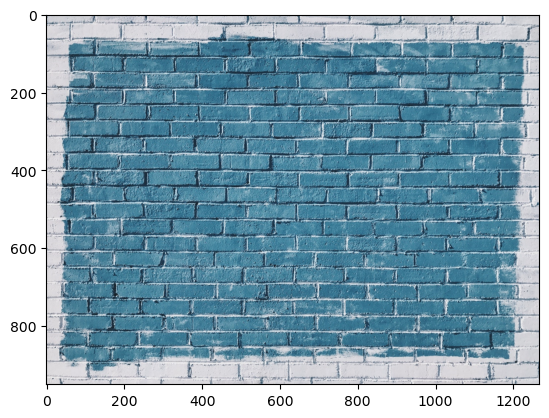

In [27]:
plt.imshow(brickshow) #mavi tuğlalar var ve BGR olarak tanımlı 

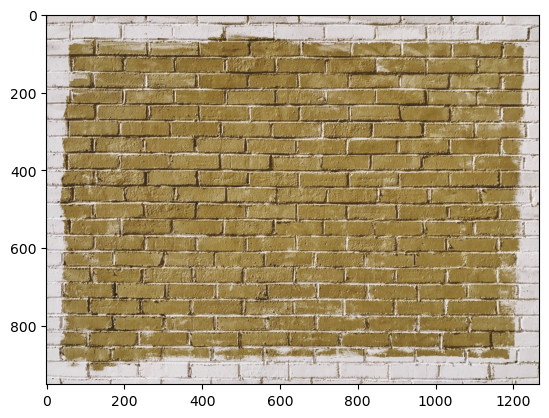

In [38]:
plt.imshow(bricksimg)

In [31]:
histval=cv2.calcHist([bricksimg],channels=[0],mask=None,histSize=[256],ranges=[0,256])#maviyi alıyoruz 

In [33]:
histval.shape

(256, 1)

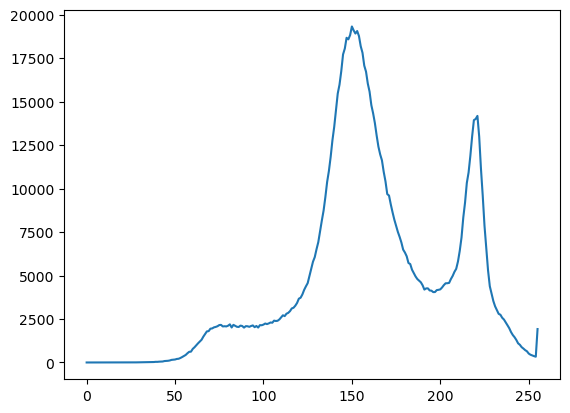

In [34]:
plt.plot(histval)

In [35]:
histval=cv2.calcHist([darkimg],channels=[0],mask=None,histSize=[256],ranges=[0,256])#çok fazla siyah renk var ve mavi beklenmemeli

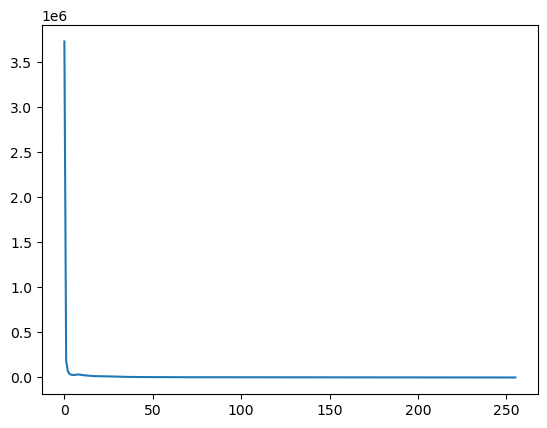

In [37]:
plt.plot(histval)

Text(0.5, 1.0, 'Histogram')

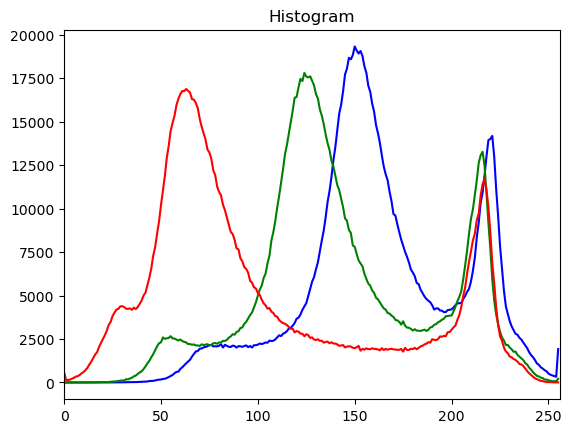

In [39]:
img=bricksimg
color =("b","g","r")
for i ,col in enumerate(color):
    histr=cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])
plt.title("Histogram")

In [ ]:
#sıfır ve 255 değerine sahip , bu nedenle saf beyaz olan hiçbir şey sahip değildir ve siyah olan hiçbir şeye sahip değildir 
#yapılacak şey renk derinliğini azaltacak olan hist. eşitleme olacaktır yani gri tonlamasını azaltmasıdır 
#52 ile 154    52 olan min değer 0  154 değer olan max değer 1 e dönüşür 
#sslerde 2. görselde değiştirilmiş hali bulnuyor
#kırmızı gri ölçekli değerleri histogramı temsil eder ve ardından siyah çizgi kamülatif ve esasen bunun yaptığı şey,
#mümkün olan max değere doğru ilerledikçe bir şeyler eklemeye devam etmektedir   gerçek görüntüde çok daha yüksek 
#kontrast elde ederiz   , düşük konstrantlıdan yola çıkarsak ve hist eşitlemeye başvurursak yüksek konstrastlı bir şey elde eder,z
#dolayısıyla kırmızı hist. rotayı siyah kümülatif histograma karşı alırsak bu kamülütüf hist. alır öncekinden çok daha 
#doğrusal hale getiririrz 

In [ ]:
 bir görüntünün kontrastını artırmak için kullanılır. Bu işlem, görüntüdeki piksel değerlerinin dağılımını
düzleştirerek daha geniş bir aralıkta yayılmasını sağlar. Bu sayede görüntüdeki detaylar daha belirgin hale gelirve görsel kalite artırılır.


Histogram Eşitlemenin Amaçları
Kontrast Artışı: Görüntüdeki düşük kontrastlı alanları düzleştirerek daha fazla detayın görünür hale gelmesini sağlar.
Görselleştirme: Özellikle tıbbi görüntüler veya uydu görüntüleri gibi alanlarda, detayların daha iyi algılanmasını sağlar.
İkili Görüntü İşleme: İkili görüntüleme işlemleri öncesinde, histogram eşitleme kullanılarak nesnelerin 
daha net bir şekilde ayrılması sağlanabilir.

Histogram Nedir?
Histogram, bir görüntüdeki piksel değerlerinin (parlaklık veya renk değerleri) dağılımını gösteren bir grafik türüdür.
Yatay eksende piksel değerleri (örneğin 0-255 arasındaki grayscal değerleri), dikey eksende ise bu değerlere karşılık 
gelen piksel sayıları yer alır.


Histogram Eşitleme Nasıl Çalışır?

Görüntüdeki Piksel Değerlerini Hesaplama: İlk olarak, görüntüdeki her bir pikselin parlaklık değerleri sayılırve histogram oluşturulur.

Kümülatif Dağılım Fonksiyonu (CDF) Hesaplama: Piksel değerleri için kümülatif dağılım fonksiyonu hesaplanır
. Bu, her piksel değerinin histogramdaki toplam piksel sayısına oranını gösterir. 
CDF, her bir piksel değerinin daha düşük değerlere göre ne kadar sıklıkla göründüğünü gösterir.


Yeni Piksel Değerlerinin Hesaplanması: Eşitlenmiş histogramı elde etmek için, 
    kümülatif dağılım fonksiyonundaki her piksel değeri için yeni bir değer hesaplanır. 
Bu değer, orijinal piksel değerinin CDF değeri ile orantılıdır. Elde edilen yeni değerler, orijinal piksel değerlerinin yerine kullanılır.

Görüntüyü Güncelleme: Hesaplanan yeni piksel değerleri kullanılarak görüntü güncellenir.

In [62]:
rainbow=cv2.imread(r"C:\Users\meric\Desktop\Computer-Vision-with-Python\DATA\rainbow.jpg")
rainshow=cv2.cvtColor(rainbow,cv2.COLOR_BGR2RGB)

In [41]:
img=rainbow

In [42]:
img.shape

(550, 413, 3)

In [43]:
img.shape[:2]

(550, 413)

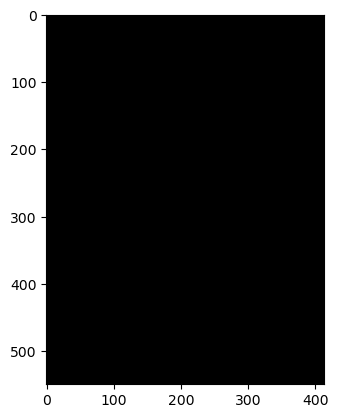

In [57]:
#maske oluşturma 
mask=np.zeros(img.shape[:2],dtype=np.uint8) #sadece x ve y ile maskeyle ilgileniyoruz 2D düzlenminde istiyoruz ve sonra bu maske diğer 
# 3 kanala genişletecek   maskelerin bazı boyutlarını beyaz olarak atamak 
plt.imshow(mask,cmap="gray")

In [58]:
mask[300:400,100:400]=255

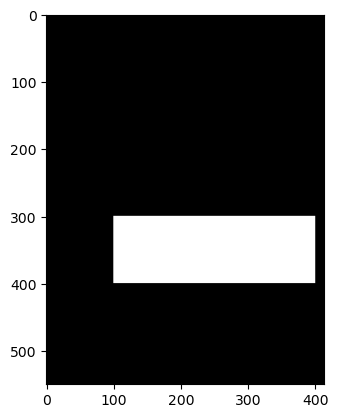

In [59]:
plt.imshow(mask,cmap="gray")

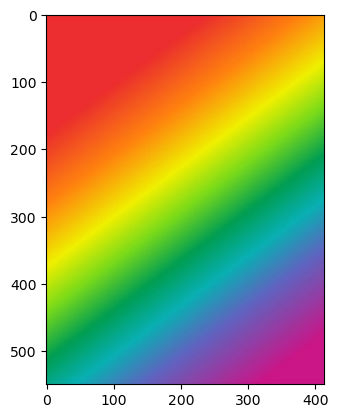

In [63]:
plt.imshow(rainshow)

In [64]:
masked=cv2.bitwise_and(img,img,mask=mask)

In [66]:
showmasked=cv2.bitwise_and(rainshow,rainshow,mask=mask)

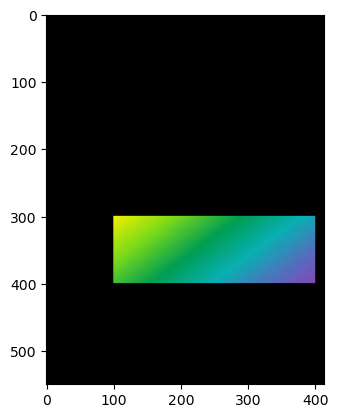

In [67]:
plt.imshow(showmasked) #kırmızı yok bgr den 2 yi çekcez bakalım histogramda nasıl gözükoyr
#rainbowda kırmızı olan kısmı filtreleyip filtreliyi histogramda bi de normalini histogramda gösterip karşılaştırma yapacğız 

In [68]:
hisfilterred=cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])
hisnotfilter=cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])

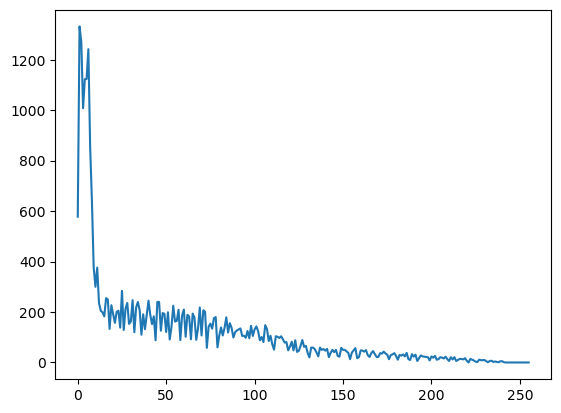

In [69]:
plt.plot(hisfilterred)

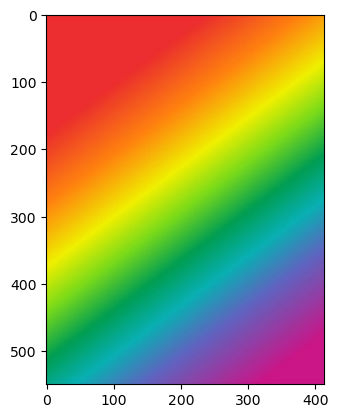

In [72]:
plt.imshow(rainshow)

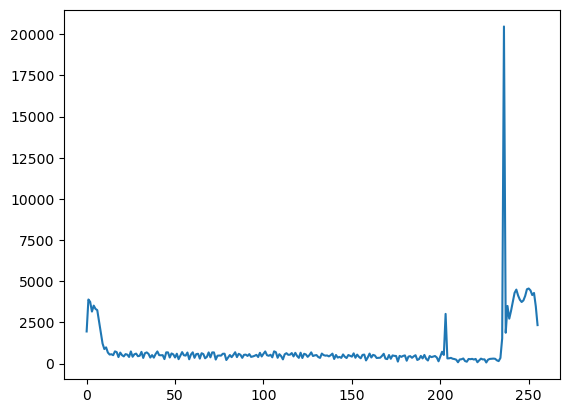

In [74]:
plt.plot(hisnotfilter)

In [79]:
gorilla=cv2.imread(r"C:\Users\meric\Desktop\Computer-Vision-with-Python\DATA\gorilla.jpg",0)

In [80]:
def displayimg(img,cmap="gray"):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap)


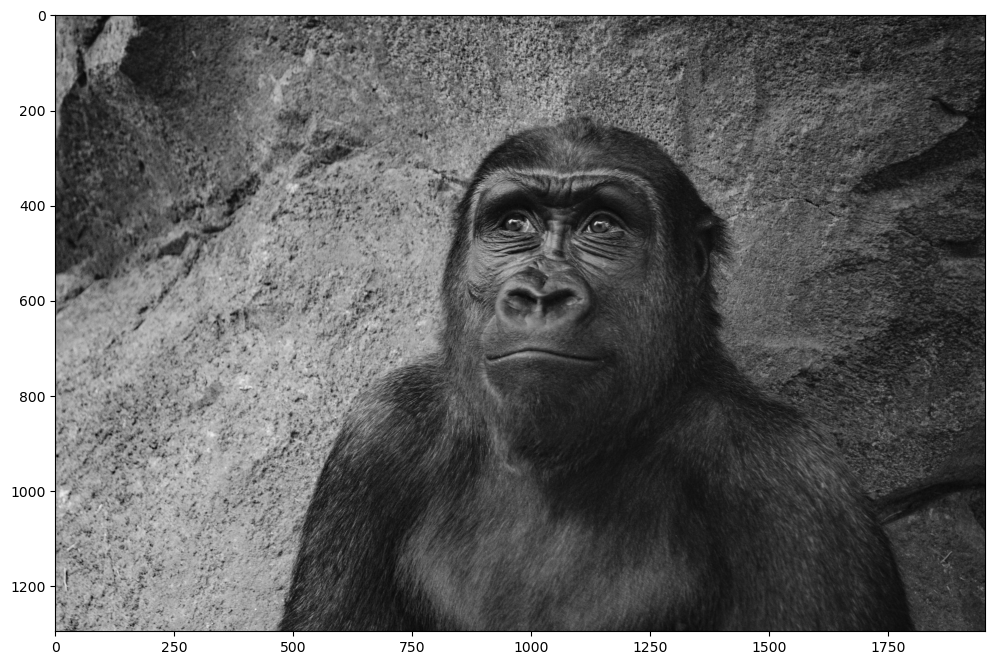

In [81]:
displayimg(gorilla,cmap="gray")

In [82]:
cons=cv2.equalizeHist(gorilla)

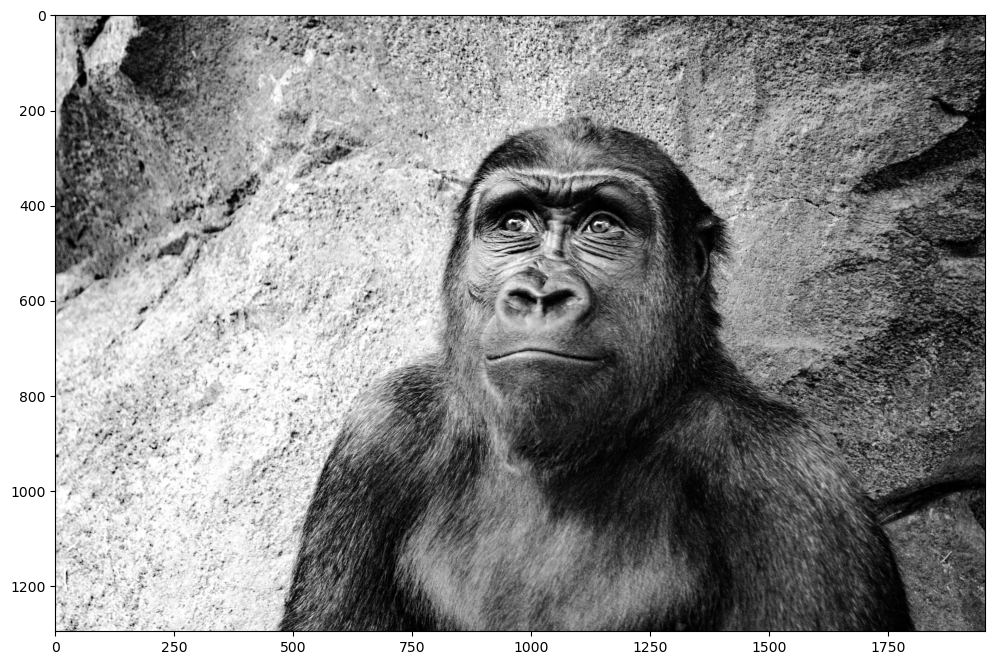

In [83]:
displayimg(cons,cmap="gray")

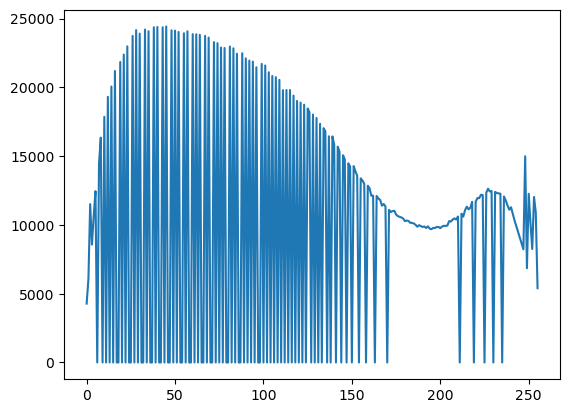

In [84]:
gorilhist=cv2.calcHist([cons],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(gorilhist) #sürekli ani düşüşler 0 dır yani siyah yerlerdir 

In [88]:
gorilla=cv2.imread(r"C:\Users\meric\Desktop\Computer-Vision-with-Python\DATA\gorilla.jpg",)
showg=cv2.cvtColor(gorilla,cv2.COLOR_BGR2RGB)

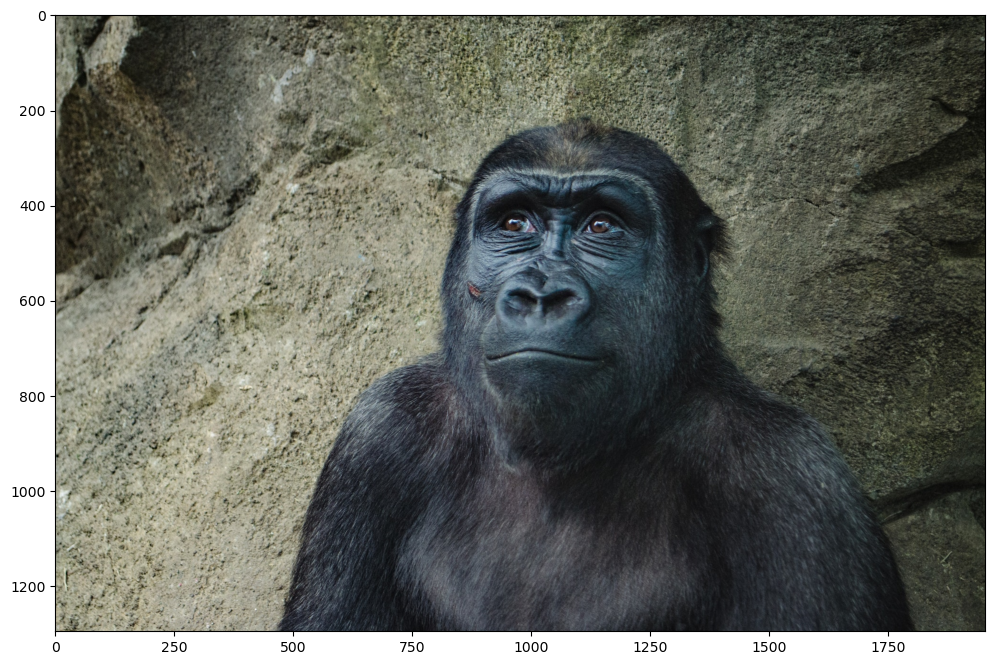

In [89]:
displayimg(showg)

In [91]:
hsv=cv2.cvtColor(gorilla,cv2.COLOR_BGR2HSV)

In [92]:
hsv

array([[[ 34,  28, 127],
        [ 34,  30, 121],
        [ 34,  31, 115],
        ...,
        [ 40,  53,  43],
        [ 38,  67,  42],
        [ 38,  67,  42]],

       [[ 34,  30, 121],
        [ 34,  29, 124],
        [ 34,  29, 123],
        ...,
        [ 38,  60,  47],
        [ 38,  57,  49],
        [ 38,  55,  51]],

       [[ 34,  30, 118],
        [ 34,  28, 129],
        [ 34,  27, 131],
        ...,
        [ 38,  60,  47],
        [ 38,  56,  50],
        [ 38,  53,  53]],

       ...,

       [[ 30,  16, 196],
        [ 32,  18, 198],
        [ 26,  23, 185],
        ...,
        [ 43,  32,  55],
        [ 43,  32,  55],
        [ 43,  32,  55]],

       [[ 30,  17, 184],
        [ 32,  19, 185],
        [ 28,  27, 182],
        ...,
        [ 43,  35,  51],
        [ 43,  34,  52],
        [ 43,  34,  53]],

       [[ 26,  22, 174],
        [ 26,  26, 170],
        [ 29,  31, 173],
        ...,
        [ 43,  36,  49],
        [ 43,  36,  50],
        [ 43,  36,  50]]

In [93]:
hsv[:,:,2]

array([[127, 121, 115, ...,  43,  42,  42],
       [121, 124, 123, ...,  47,  49,  51],
       [118, 129, 131, ...,  47,  50,  53],
       ...,
       [196, 198, 185, ...,  55,  55,  55],
       [184, 185, 182, ...,  51,  52,  53],
       [174, 170, 173, ...,  49,  50,  50]], dtype=uint8)

In [ ]:
HSV (Hue, Saturation, Value) renk uzayı, renkleri daha sezgisel bir biçimde temsil eder. Her bir bileşen şu şekilde tanımlanır:

Hue (H): Renk tonunu temsil eder (0-360 derece arasında bir açı).
Saturation (S): Rengin doygunluğunu belirtir. Doygunluk, rengin ne kadar "canlı" olduğunu gösterir (0-100% arasında).
Value (V): Rengin parlaklığını veya ışıklılığını gösterir (0-100% arasında).
hsv[:,:,2] Kullanımı
hsv: Bu, HSV renk uzayındaki bir görüntüyü temsil eden bir NumPy dizisidir. 
    Genellikle, bir görüntü HSV uzayına dönüştürüldüğünde, bu dizi üç boyutlu bir yapı alır:

İlk boyut: Yükseklik (yüksekliği)
İkinci boyut: Genişlik (genişliğini)
Üçüncü boyut: 3 renk kanalı (Hue, Saturation, Value)
hsv[:,:,2]: Bu ifade, HSV dizisinin üçüncü kanalını (Value kanalını) seçer. 
    Yani, tüm piksellerin parlaklık değerlerini içeren 2D bir dizi elde edersiniz.

:: Bu, tüm satırları (yükseklik) seçmek anlamına gelir.
:: Bu, tüm sütunları (genişlik) seçmek anlamına gelir.
2: Bu, üçüncü kanalı (Value) temsil eder.

In [94]:
hsv[:,:,2]=cv2.equalizeHist(hsv[:,:,2])

In [95]:
eqgorilla=cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)

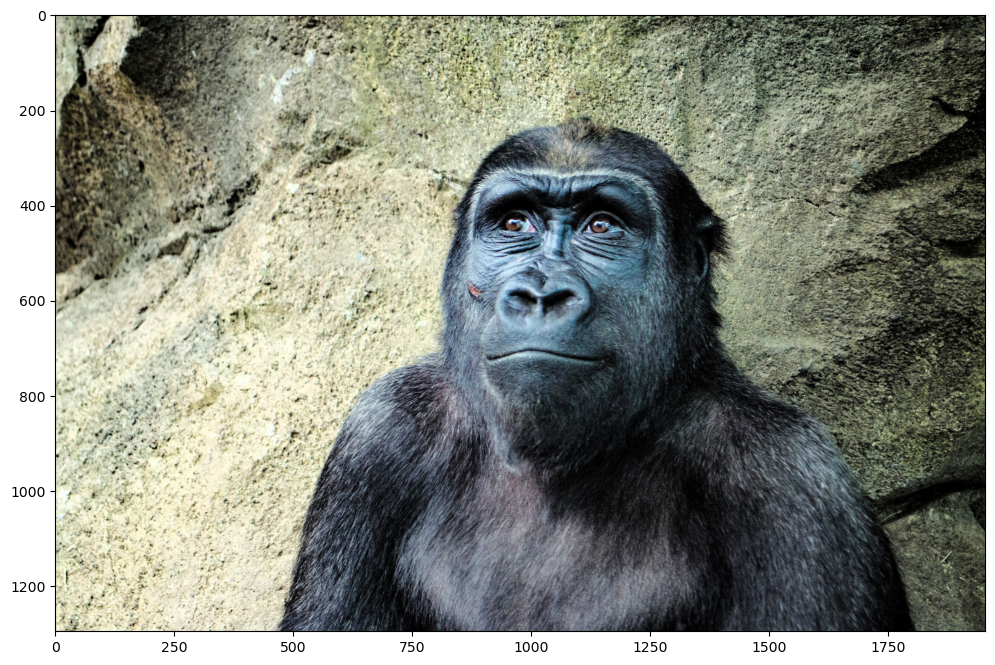

In [97]:
displayimg(eqgorilla)